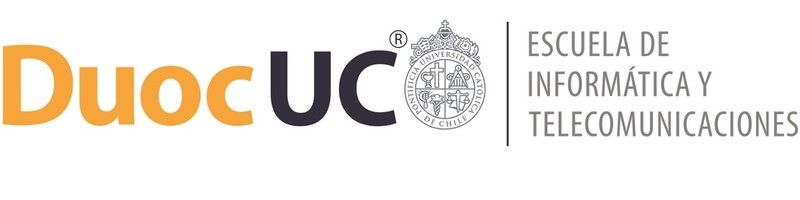

#Informe Tecnico - Examen transversal de Machine learning de Banco Monopoly
*   Integrantes: Bastian Lira
*   Docente:Giocrisrai Godoy Bonillo
*   Sección: MACHINE LEARNING_002D

## Fase 1 Comprensión del negocio

El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”. Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de sus productos financieros.

Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente. Ustedes son parte del equipo de ingenieros del banco Dormammu, y con sus colegas deben analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado. La base de datos tiene variables asociadas a información del cliente y variables mensuales, es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.

Resumen del contexto

El cliente referido como "Banco monopoly" me contrato como analista de datos,
Logrando asi identificar distintos aspectos en el contexto de negocios,identificando que se necesita una estrategia para atraer potenciales nuevos clientes al banco para ello, Es importante analizar el uso de los productos financieros. Finalmente, podemos decir que la base de datos tiene 574 variables (columnas) y 51.124 registros (filas). También es importante destacar que cada fila contiene registros únicos de clientes , todos los datos tratados corresponden a una base que comprende un total de 12 meses de datos de los clientes banco monopoly de forma mensual por cada cliente.
Ademas para este caso se usara la metodologia CRISP-DM para una mejor organizacion ya que se dividen en distintas fases y mejor entendimiento del caso.

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \hline \hline \text { Dato } & \text { Descripción } \\
\hline \text{ region} & \text { region de residencia} \\
\hline \text{renta} & \text { renta de cliente} \\
\hline \text{ sexo} & \text { sexo} \\
\hline \text{ Edad} & \text { Edad} \\
\hline \text{ Adicional} & \text { indicador de tenecia de TC adicionales} \\
\hline \text{ Antiguedad} & \text { Antiguedad de clientes (meses)} \\
\hline \text{ consumo} & \text { indicador de credito consumo} \\
\hline \text{ debito} & \text {indicador de tenecia de TD } \\
\hline \text{ ctacte} & \text { indicador de cuenta corriente} \\
\hline \text{ cuentas} & \text { numero de cuentas que tiene el cliente} \\
\hline \text{ hipotecario} & \text { indicador de credito hipotecario} \\
\hline \text{ TC} & \text { numero de TC que tiene el cliente} \\
\end{array}
\end{aligned}
$$


Objetivos generales
- Identificar grupos de clientes con comportamientos similares para personalizar productos y servicios.
- identificar que grupo de clientes que realiza mayor compra de productos y servicios.
- Identificar los productos financieros que generan más ingresos o que tienen mayor aceptación entre los clientes.

Objetivos especificos
*   Clasificar a los clientes según su nivel de riesgo de crédito en base a indicador de cuenta corriente
*   Predecir el monto total de compras anuales de un cliente en función de su edad.



## Fase 2 - Comprensión de los Datos

importacion de librerias


In [ ]:
import numpy as np
import sklearn as skt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pickle import TRUE
df = pd.read_excel('/content/drive/MyDrive/machine-learning-con-kedro-/Base_clientes_Monopoly-1.xlsx', skiprows=1)

podemos ver es las ejecuciones siguiente las distintas columnas ademas de ver la cantidad de columnas y los tipos de datos que tiene el dataset

In [ ]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=575)

In [ ]:
df.shape

(51124, 575)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 575 entries, Id to Unnamed: 574
dtypes: float64(509), int64(53), object(13)
memory usage: 224.3+ MB


podemos ver en el siguiente codigo los distintos datos con los rangos intercuartiles ademas de el valor min y el valor maximo.

In [ ]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000,NaN
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000,NaN
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000,NaN
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000,NaN
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000,NaN


In [ ]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [ ]:
df.tail()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0,NaN
51123,51124,170,H,13.0,51,840878.0,75,1,1,0,...,12360,0.0,12360.0,0.0,18500.0,0,0.0,R,0,NaN


## Analisis de la variable Edad

In [ ]:
df['Edad'].mean()

38.70287927392223

In [ ]:
df['Edad'].median()

35.0

In [ ]:
df['Edad'].mode()

,Edad
0,27


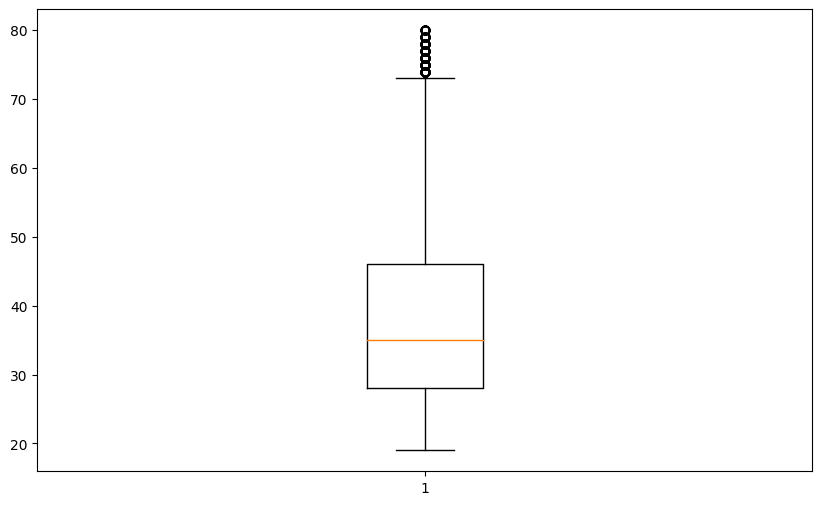

In [ ]:
df = df [(df['Edad']>= 18)&(df['Edad']<=80)]
fig = plt.figure(figsize=(10,6))
plt.boxplot(df['Edad'])
plt.show()

### Analisis de la variable Ctacte

In [ ]:
df['Ctacte'].mean()

0.9258415938757484

In [ ]:
df['Ctacte'].median()

1.0

In [ ]:
df['Ctacte'].mode()

,Ctacte
0,1


## Fase 3 - Preparación de los Datos

In [ ]:
#estos son los datos que usaremos para realizar los objetivos planteados
df1 = pd.DataFrame(df[["Renta","Edad","Sexo","Antiguedad","Consumo","Debito","Adicional","Ctacte","TC","Cuentas","Hipotecario","Region"]])

In [ ]:
#Se aprecia cuantos nulos hay en los datos
df1.isnull().sum()

,0
Renta,13241
Edad,0
Sexo,0
Antiguedad,0
Consumo,0
Debito,0
Adicional,0
Ctacte,0
TC,0
Cuentas,0


In [ ]:
# Resumen de las variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50945 entries, 0 to 51123
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Renta        37704 non-null  float64
 1   Edad         50945 non-null  int64  
 2   Sexo         50945 non-null  object 
 3   Antiguedad   50945 non-null  int64  
 4   Consumo      50945 non-null  int64  
 5   Debito       50945 non-null  int64  
 6   Adicional    50945 non-null  int64  
 7   Ctacte       50945 non-null  int64  
 8   TC           50945 non-null  int64  
 9   Cuentas      50945 non-null  int64  
 10  Hipotecario  50945 non-null  int64  
 11  Region       50892 non-null  float64
dtypes: float64(2), int64(9), object(1)
memory usage: 5.1+ MB


In [ ]:
# descripción de las distintas variables como la media,su valor mínimo,su valor Máximo
df1.describe()

,Renta,Edad,Antiguedad,Consumo,Debito,Adicional,Ctacte,TC,Cuentas,Hipotecario,Region
count,3.770400e+04,50945.000000,50945.000000,50945.000000,50945.000000,50945.000000,50945.000000,50945.000000,50945.000000,50945.000000,50892.000000
mean,6.632504e+05,38.545255,38.682756,0.000883,0.876396,0.255766,0.925842,1.733045,1.408323,0.138012,10.827694
std,4.091703e+05,13.051162,35.410446,0.029708,0.329132,0.436295,0.262031,0.877816,0.550705,0.344916,3.393353
min,1.000000e+00,19.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,4.200000e+05,28.000000,14.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.000000
50%,5.672410e+05,35.000000,25.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,13.000000
75%,8.150000e+05,46.000000,54.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,13.000000
max,1.308933e+07,80.000000,324.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,1.000000,13.000000


<Axes: >

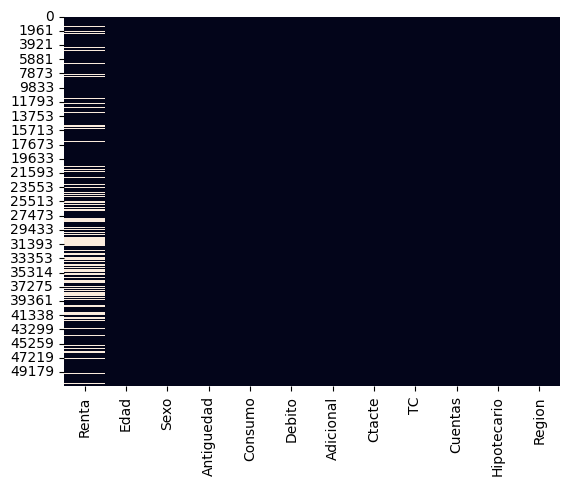

In [ ]:
#Identificamos los missing values visualmente
sns.heatmap(df1.isnull(), cbar=False)

### Exploramos los datos de renta

In [ ]:
df1.Renta.unique()

array([    nan, 143640., 929106., ..., 625376., 806220., 840878.])

In [ ]:
df1.Renta.info()

<class 'pandas.core.series.Series'>
Index: 50945 entries, 0 to 51123
Series name: Renta
Non-Null Count  Dtype  
--------------  -----  
37704 non-null  float64
dtypes: float64(1)
memory usage: 796.0 KB


In [ ]:
df1.Renta.describe()

,Renta
count,3.770400e+04
mean,6.632504e+05
std,4.091703e+05
min,1.000000e+00
25%,4.200000e+05
50%,5.672410e+05
75%,8.150000e+05
max,1.308933e+07


In [ ]:
## primero cambiamos las comas por puntos
df1['Renta'] = df1['Renta'].astype(str).str.replace(',', '.').astype(float)

In [ ]:
#rellenamos los datos faltantes con knn inputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
df1[['Renta']] = knn_imputer.fit_transform(df1[['Renta']])

comprobacion de datos faltantes

In [ ]:
df1.isna().sum()

,0
Renta,0
Edad,0
Sexo,0
Antiguedad,0
Consumo,0
Debito,0
Adicional,0
Ctacte,0
TC,0
Cuentas,0


<Axes: >

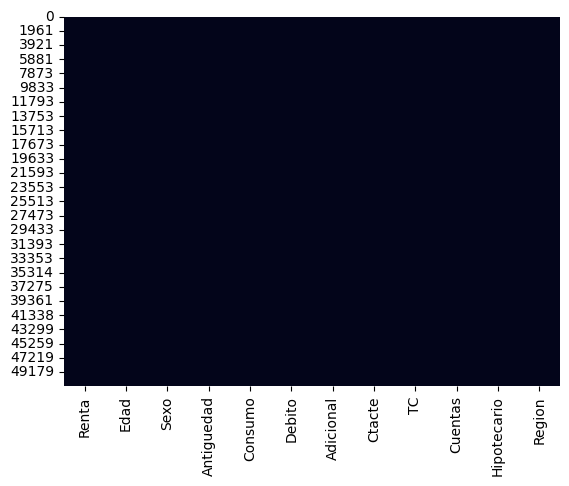

In [ ]:
#comprobamos de forma mas visual los datos faltantes
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
#considerando que los datos faltantes son 53 de region y 1 de sexo los eliminamos
df1.dropna(subset=['Sexo', 'Region'], inplace=True)

In [ ]:
#verificamos denuevo los datos faltantes y vemos que estan limpios
df1.isna().sum()

,0
Renta,0
Edad,0
Sexo,0
Antiguedad,0
Consumo,0
Debito,0
Adicional,0
Ctacte,0
TC,0
Cuentas,0


## Analizaremos los Demas datos

### Renta

In [ ]:
df1.Renta.describe()

,Renta
count,5.089200e+04
mean,6.633841e+05
std,3.521060e+05
min,1.000000e+00
25%,4.667568e+05
50%,6.632504e+05
75%,7.104132e+05
max,1.308933e+07


<Axes: xlabel='Renta', ylabel='Count'>

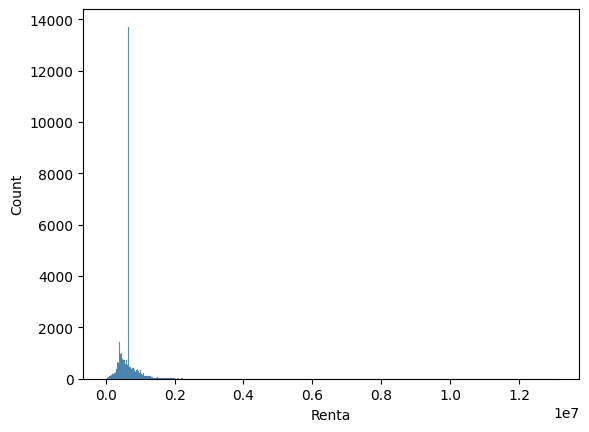

In [ ]:
# Histograma:

sns.histplot(df1.Renta)

### Edad

Se puede apreciar el análisis de  la variable Edad ademas de un histograma mostrando que la mayor cantidad de personas que son parte del banco son de entre 28 y 30 años.

In [ ]:
df1.Edad.describe()

,Edad
count,50892.000000
mean,38.553112
std,13.053192
min,19.000000
25%,28.000000
50%,35.000000
75%,46.000000
max,80.000000


<Axes: xlabel='Edad', ylabel='Count'>

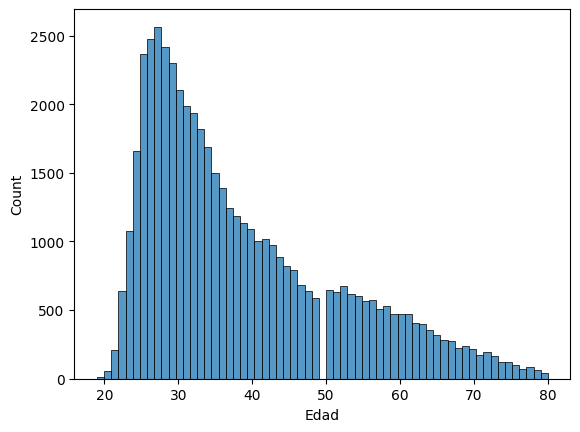

In [ ]:
# Histograma
sns.histplot(df1.Edad)

### Sexo

Se puede apreciar el análisis de  la variable Sexo ademas de un histograma mostrando que hay mas hombre que mujeres en el banco monopoly

In [ ]:
df1.Sexo.describe()

,Sexo
count,50892
unique,2
top,H
freq,27274


<Axes: xlabel='Sexo', ylabel='Count'>

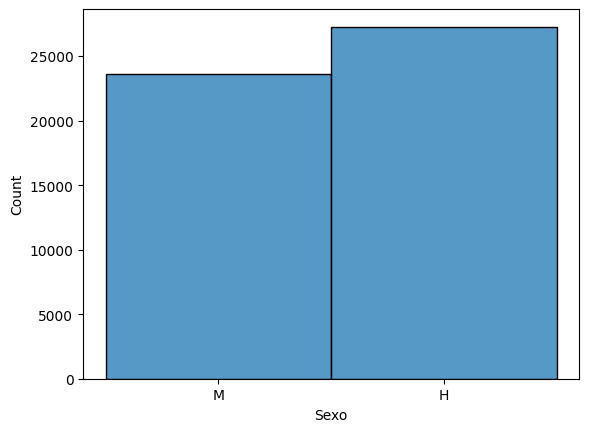

In [ ]:
# Histograma
sns.histplot(df1.Sexo)

### Consumo

In [ ]:
df.Consumo.describe()

,Consumo
count,50945.000000
mean,0.000883
std,0.029708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='Consumo', ylabel='Count'>

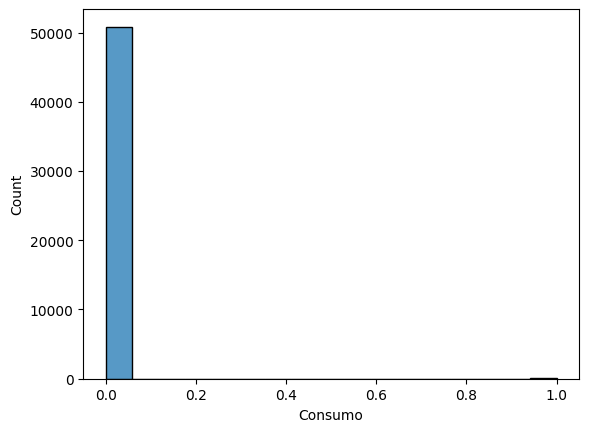

In [ ]:
# histograma
sns.histplot(df1.Consumo)

###Antiguedad

In [ ]:
df.Antiguedad.describe()

,Antiguedad
count,50945.000000
mean,38.682756
std,35.410446
min,6.000000
25%,14.000000
50%,25.000000
75%,54.000000
max,324.000000


<Axes: xlabel='Antiguedad', ylabel='Count'>

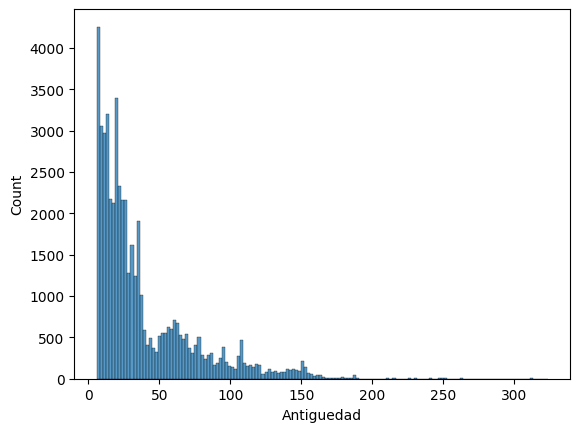

In [ ]:
# histograma
sns.histplot(df1.Antiguedad)

###Debito

In [ ]:
df1.Debito.describe()

,Debito
count,50892.000000
mean,0.876326
std,0.329212
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: xlabel='Debito', ylabel='Count'>

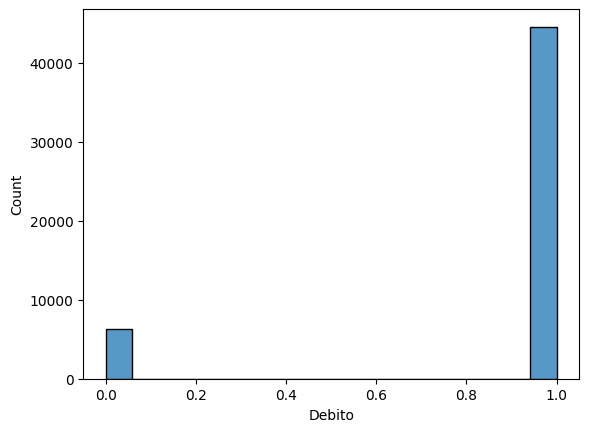

In [ ]:
# histograma
sns.histplot(df1.Debito)

###Ctacte

Se puede apreciar el análisis de  la variable ctante ademas de un histograma mostrando que es 1 es que poseen una cuenta corriente y 0 que no poseen una cuenta corriente

In [ ]:
df1.Cuentas.describe()

,Cuentas
count,50892.000000
mean,1.408473
std,0.550788
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


<Axes: xlabel='Ctacte', ylabel='Count'>

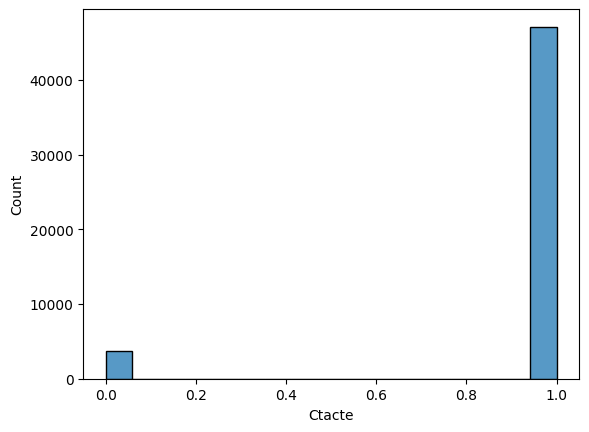

In [ ]:
# histograma
sns.histplot(df1.Ctacte)

###Cuentas


In [ ]:
df1.Ctacte.describe()

,Ctacte
count,50892.000000
mean,0.925804
std,0.262093
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: xlabel='Cuentas', ylabel='Count'>

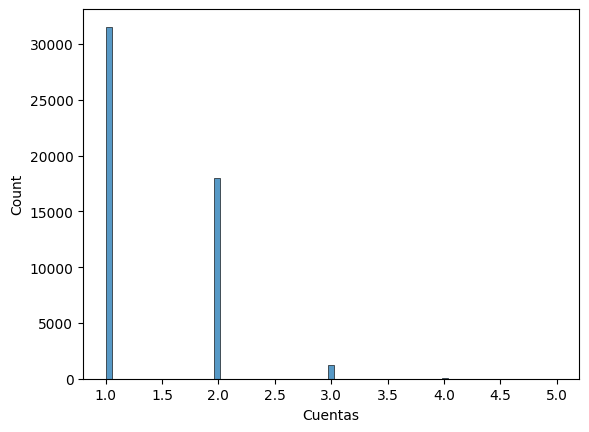

In [ ]:
sns.histplot(df1.Cuentas)

###Hipotecario

In [ ]:
df1.Hipotecario.describe()

,Hipotecario
count,50892.000000
mean,0.138136
std,0.345046
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='Hipotecario', ylabel='Count'>

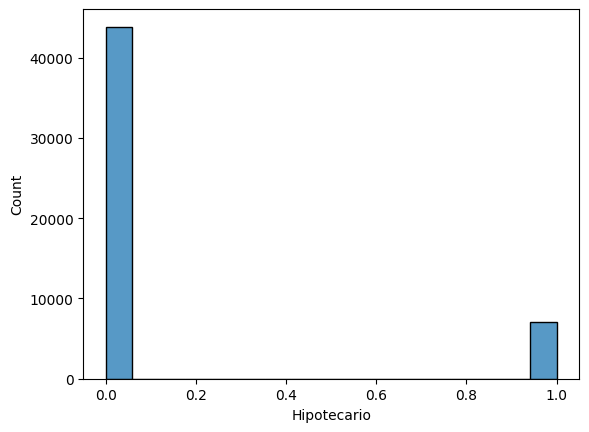

In [ ]:
#histograma
sns.histplot(df1.Hipotecario)

###Region

In [ ]:
df1.Region.describe()

,Region
count,50892.000000
mean,10.827694
std,3.393353
min,1.000000
25%,9.000000
50%,13.000000
75%,13.000000
max,13.000000


<Axes: xlabel='Region', ylabel='Count'>

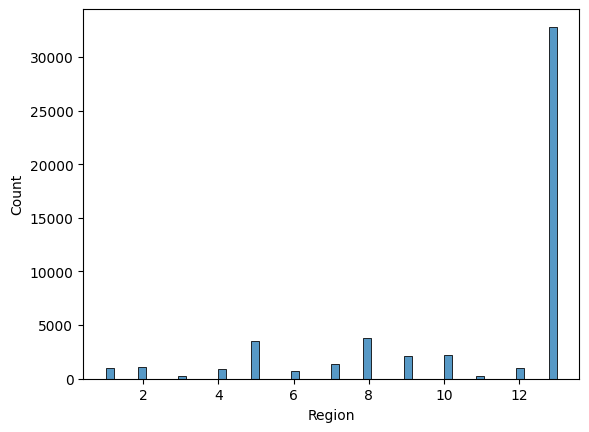

In [ ]:
# histograma
sns.histplot(df1.Region)

###Diagrama de cajas region/renta


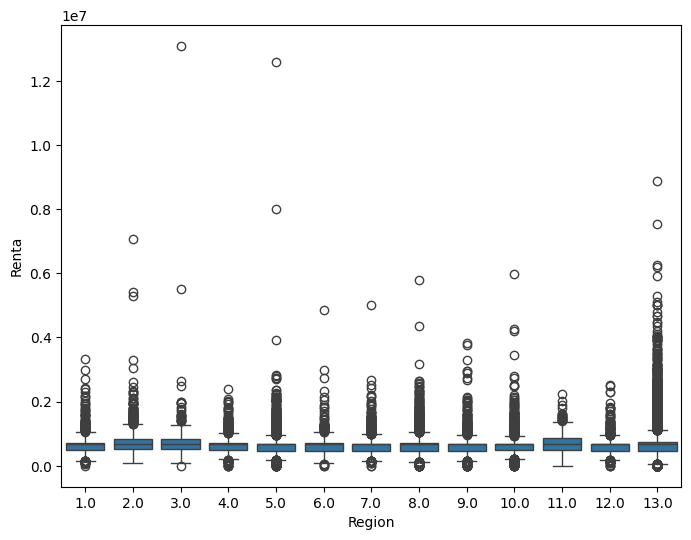

In [ ]:
var = 'Region'
data = pd.concat([df1['Renta'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Renta", data=data)

###Diagrama de dispersión Region/Edad

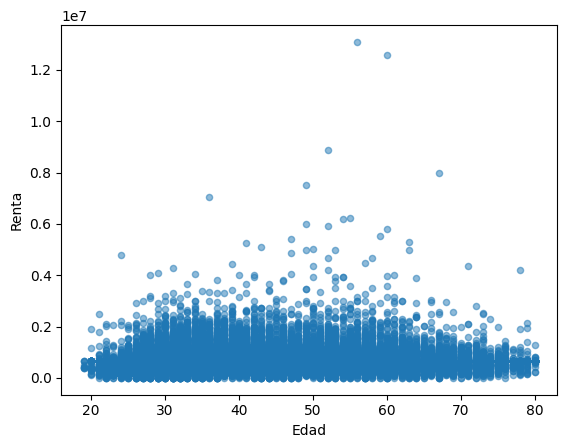

In [ ]:


var = 'Edad'
data = pd.concat([df1['Renta'], df1[var]], axis=1)
data.plot.scatter(x=var, y='Renta', alpha = 0.5);


###Grafico de diagrama de caja Sexo / Edad

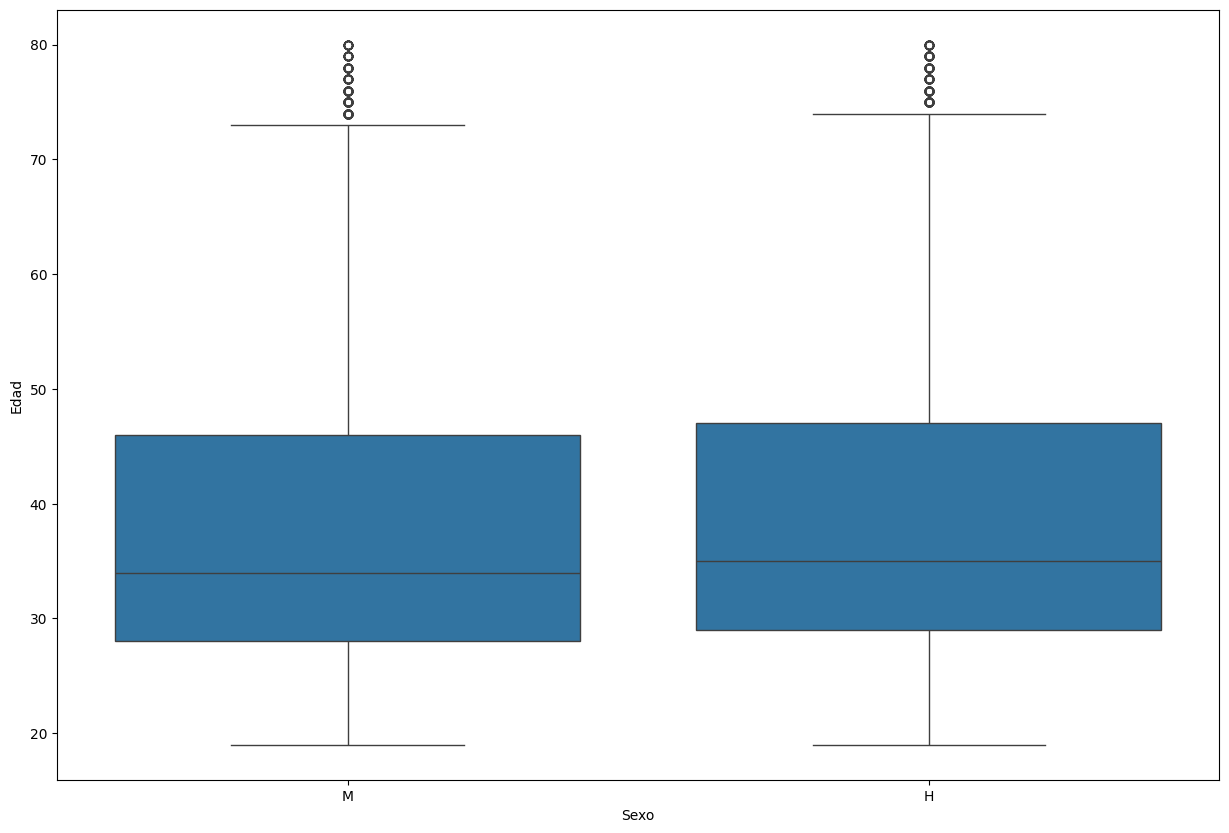

In [ ]:
# Diagrama de cajas sexo/edad

var = 'Sexo'
data = pd.concat([df1['Edad'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var, y="Edad", data=data)

###Manejo de los valores atipicos

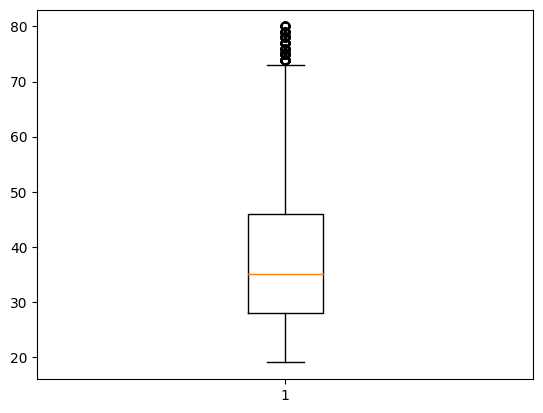

In [ ]:
plt.boxplot(list(df1['Edad']))
plt.show()

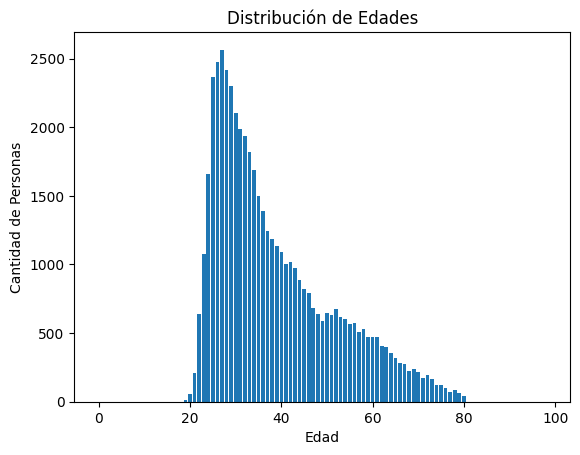

In [ ]:
# distriución de la variable edad

plt.hist(df1['Edad'], bins=range(0, 100), align='left', rwidth=0.8)
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Edades')
plt.show()


In [ ]:
# filtramos edaddes mayores a 80 años
df1 = df1.query('Edad < 70')


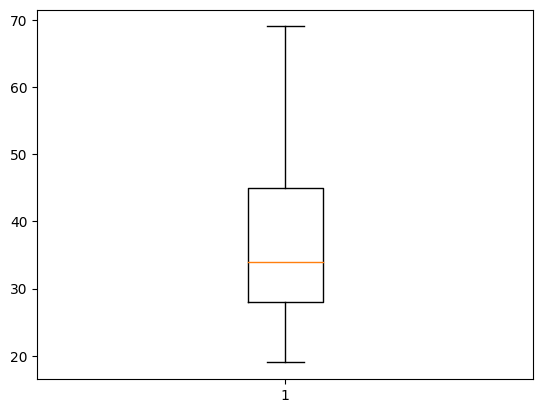

In [ ]:
# boxplot despues de quiar ouliers

plt.boxplot(list(df1['Edad']))
plt.show()

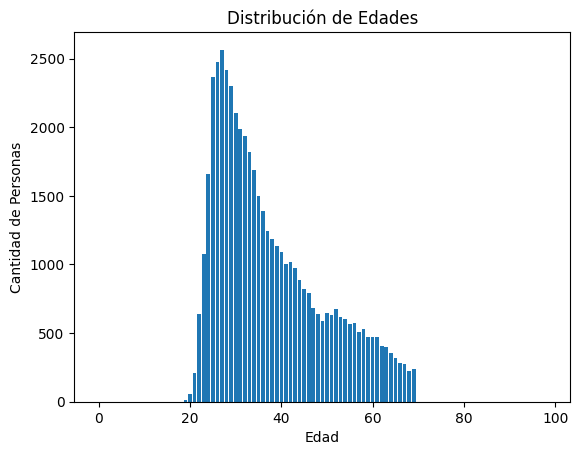

In [ ]:
# distribución después de quitar outliers

plt.hist(df1['Edad'], bins=range(0, 100), align='left', rwidth=0.8)
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Edades')
plt.show()

###Transformacion de variables

transformación de la variable sexo a numerica a través de la tecnica de label encoder para que 1 se hombre y 0 mujer

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df1['Sexo']= label_encoder.fit_transform(df1['Sexo'])

df1['Sexo'].unique()

array([1, 0])

In [ ]:
# Estandarización de datos se realiza para fases posteriores como el parendizaje automatico
scaler = StandardScaler()
df1_standarscaler = scaler.fit_transform(df1)
df1_standarscaler


array([[-1.15943464e-03,  4.55525024e-01,  1.07305854e+00, ...,
        -7.48165632e-01, -4.05172032e-01,  6.39036242e-01],
       [-1.47065129e+00,  7.08652381e-01, -9.31915609e-01, ...,
        -7.48165632e-01,  2.46808743e+00,  6.39036242e-01],
       [ 7.50697627e-01,  6.24276595e-01, -9.31915609e-01, ...,
        -7.48165632e-01,  2.46808743e+00,  6.39036242e-01],
       ...,
       [ 4.03168029e-01,  7.93028167e-01, -9.31915609e-01, ...,
        -7.48165632e-01, -4.05172032e-01,  6.39036242e-01],
       [-1.15943464e-03,  7.93028167e-01,  1.07305854e+00, ...,
        -7.48165632e-01, -4.05172032e-01,  6.39036242e-01],
       [ 5.01183106e-01,  1.13053131e+00, -9.31915609e-01, ...,
        -7.48165632e-01, -4.05172032e-01,  6.39036242e-01]])

In [ ]:
#Normalizacion de datos
scaler = Normalizer()
df1_normalize = scaler.fit_transform(df1)
df1_normalize


array([[9.99999978e-01, 6.48322296e-05, 1.50772627e-06, ...,
        1.50772627e-06, 0.00000000e+00, 1.96004415e-05],
       [9.99999829e-01, 3.20245002e-04, 0.00000000e+00, ...,
        6.96184788e-06, 6.96184788e-06, 9.05040224e-05],
       [9.99999998e-01, 4.84336555e-05, 0.00000000e+00, ...,
        1.07630346e-06, 1.07630346e-06, 1.39919449e-05],
       ...,
       [9.99999980e-01, 5.82967417e-05, 0.00000000e+00, ...,
        1.24035621e-06, 0.00000000e+00, 1.61246307e-05],
       [9.99999997e-01, 7.08631360e-05, 1.50772630e-06, ...,
        1.50772630e-06, 0.00000000e+00, 1.96004419e-05],
       [9.99999994e-01, 6.06508907e-05, 0.00000000e+00, ...,
        1.18923315e-06, 0.00000000e+00, 1.54600310e-05]])

In [ ]:
scaler = MinMaxScaler()
df1_minmaxscaler =  scaler.fit_transform(df1)
df1_minmaxscaler

array([[0.05067101, 0.48      , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01097375, 0.54      , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.07098188, 0.52      , 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.06159362, 0.56      , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05067101, 0.56      , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06424143, 0.64      , 0.        , ..., 0.        , 0.        ,
        1.        ]])

###Vizualizacion

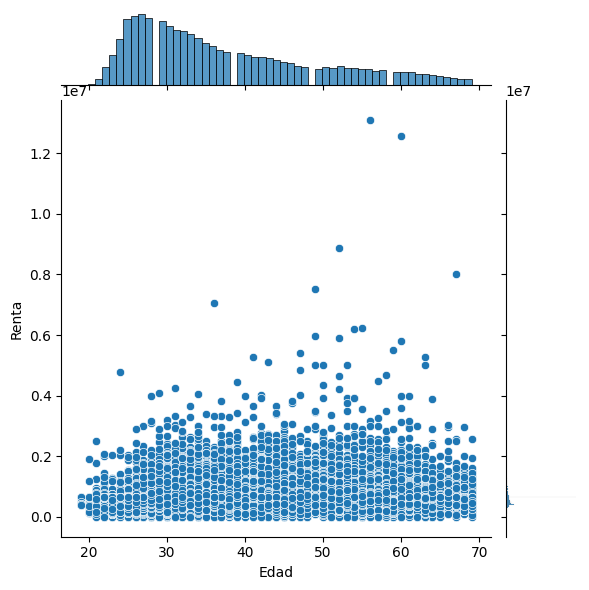

In [ ]:
sns.jointplot(x=df1['Edad'], y=df1['Renta'])


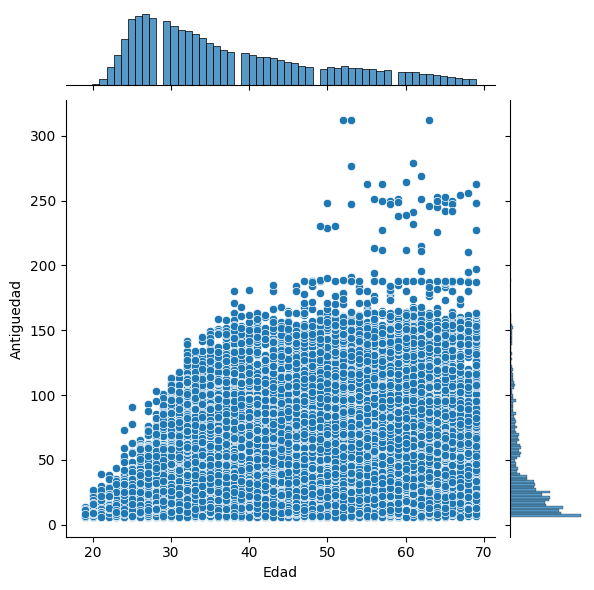

In [ ]:
sns.jointplot(x=df1['Edad'], y=df1['Antiguedad'])

###Matriz de correlación:

Se puede apreciar una matriz de correlación el cual ve que tanto tiene relación las variables entre ellas, entre valores positivos y valores negativos.

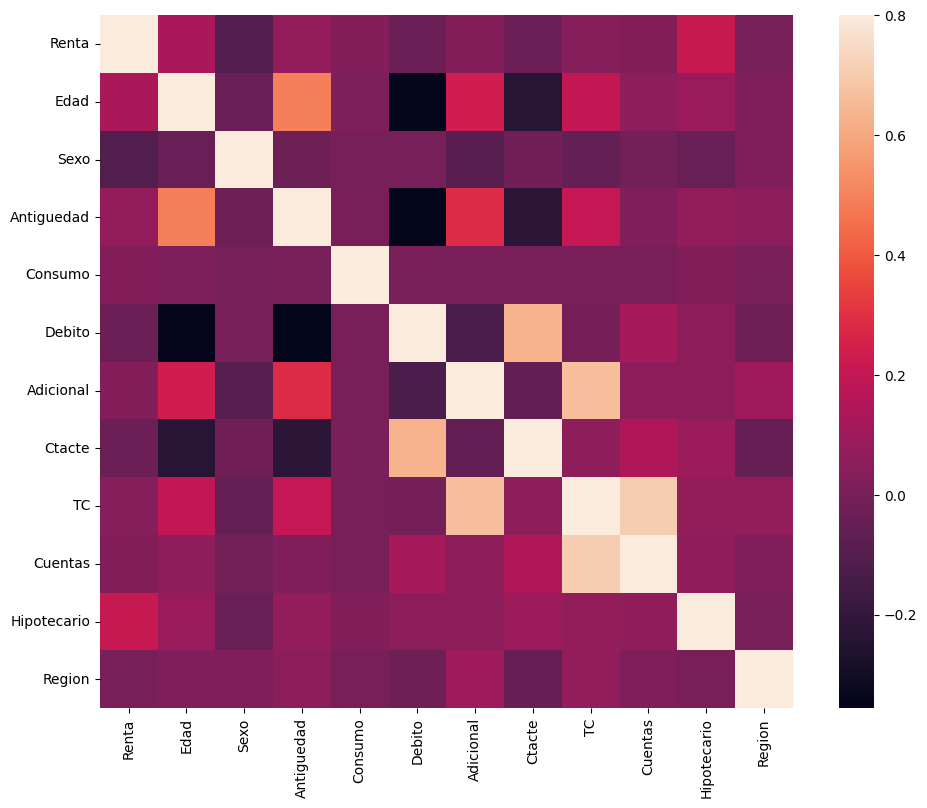

In [ ]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

###PCA

Uso de PCA para reducir dimensionalidad para mejorar la estructura de datos y los resultados a la hora del entrenamiento del modelo

In [ ]:
#se selecciona el número de componentes principales como en este caso tenemos 12 variables vamos a elegir 3 componentes principales para evitar el sobreajuste
pca = PCA(n_components=3)

In [ ]:
df1_pca = pca.fit_transform(df1_normalize)

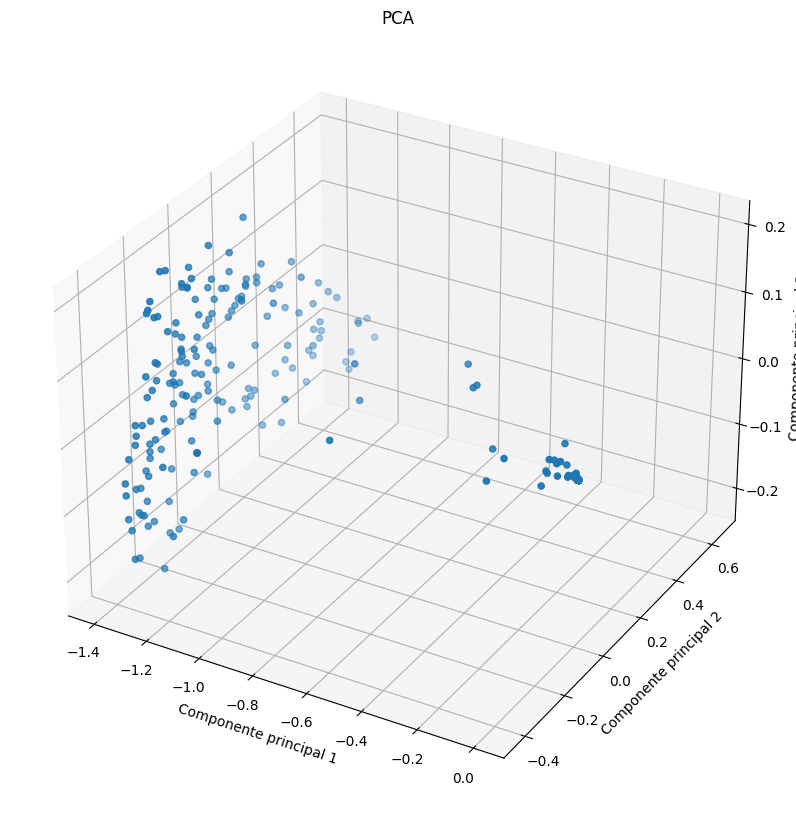

In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1_pca[:, 0], df1_pca[:, 1], df1_pca[:, 2])
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('PCA')

plt.show()

In [ ]:
print(pca.components_)

[[ 7.04787790e-01 -5.61923173e-01 -7.84105438e-03 -3.97636313e-01
   9.01383651e-10 -1.37593098e-02 -2.72619006e-03 -1.44469576e-02
  -2.57812285e-02 -2.22462095e-02 -1.13945700e-03 -1.66655539e-01]
 [-3.96741493e-02 -5.84792493e-01 -2.78423955e-03  8.02824046e-01
  -7.48694100e-11 -1.54589366e-02  7.45506718e-04 -1.41536344e-02
  -2.11904684e-02 -2.14221009e-02  8.95512149e-04 -1.02766221e-01]
 [ 1.25204525e-01 -1.56480020e-01  3.01259163e-02  2.25624700e-02
  -2.13828920e-10  5.48849414e-02  1.58047609e-02  5.03197160e-02
   9.61826579e-02  6.54150924e-02  4.61553337e-03  9.69059045e-01]]


### K-means

In [ ]:
# Utiliza los datos del PCA como entrada para k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1_pca)

KMeans(n_clusters=3)

In [ ]:
# Obtén los centroides de los clusters y las etiquetas de los datos
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

In [ ]:
# Muestra los datos de k-means por pantalla
print("Centroides de los clusters:")
print(centroides)

Centroides de los clusters:
[[ 4.62648402e-03 -2.32640999e-06  3.76503668e-06]
 [-1.34542773e+00 -1.76109058e-01  2.31687949e-03]
 [-1.31961438e+00  3.03724593e-01 -6.92268573e-03]]


In [ ]:
print("\nEtiquetas de los datos:")
print(etiquetas)


Etiquetas de los datos:
[0 0 0 ... 0 0 0]


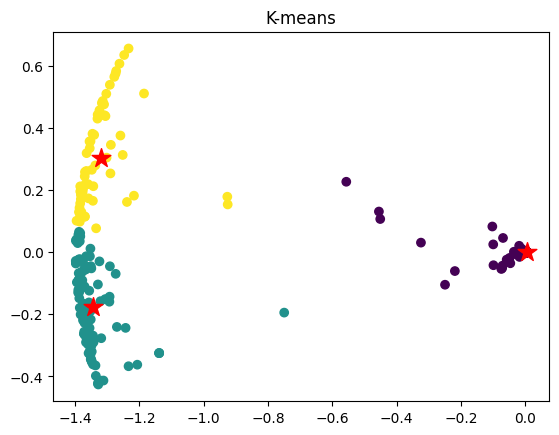

In [ ]:
# Muestra un gráfico de dispersión de los datos de k-means
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=etiquetas)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='*', s=200)
plt.title("K-means")
plt.show()

## Fase 4-Modelado

mi target para clasificacion es: ctante

mi target para regresion es: Edad

## Fase 5 - Evaluación Del Modelo

##Fase 6 - Implementación

Aqui se pondra un codigo para descargar el modelo